## Loan Approval Prediction

### Projeto de Machine Learning de Ponta a Ponta: Prevendo Aprovação de Empréstimos

### Descrição do Projeto

Este é um projeto completo de machine learning com o objetivo de prever a aprovação de empréstimos com base em características pessoais e financeiras dos solicitantes. O modelo foi desenvolvido para aprender padrões e relações entre variáveis, como renda do solicitante, histórico de crédito e status de casamento, para prever se o empréstimo será aprovado. Este repositório inclui todas as etapas do projeto, desde a coleta e preparação dos dados até o treinamento e avaliação do modelo, além de preparar o modelo para deploy.

### Objetivo do Projeto

O objetivo é construir um modelo que possa prever se um solicitante terá seu empréstimo aprovado ou não. Isso ajuda instituições financeiras a tomarem decisões de crédito mais rápidas e eficazes.

### Conjunto de Dados

O conjunto de dados utilizado contém informações de vários solicitantes e inclui as seguintes variáveis:

- **Loan_ID**: Identificação única de cada solicitação de empréstimo
- **Gender**: Gênero do solicitante
- **Married**: Status de casamento do solicitante
- **Dependents**: Número de dependentes do solicitante
- **Education**: Nível de escolaridade
- **Self_Employed**: Indica se o solicitante é autônomo
- **ApplicantIncome**: Renda mensal do solicitante
- **CoapplicantIncome**: Renda mensal do co-solicitante, se houver
- **LoanAmount**: Valor solicitado de empréstimo
- **Loan_Amount_Term**: Prazo do empréstimo em meses
- **Credit_History**: Histórico de crédito
- **Property_Area**: Localização do imóvel
- **Loan_Status**: Status de aprovação do empréstimo (variável alvo)

O dataset utilizado está disponível no arquivo **LoanData.csv** 

### Estrutura do Projeto

- **loan_approval_project.ipynb**: Notebook Jupyter com todas as etapas do projeto.
- **LoanData.csv**: Conjunto de dados utilizado para treinar o modelo.
- **loan_approval_model.pkl**: Modelo treinado salvo para deploy.
- **loan_test_data.csv**: Dados de teste utilizados na avaliação do modelo.

### Tecnologias Utilizadas

- **Python 3.9**
- **Pandas** - Para manipulação de dados.
- **NumPy** - Para cálculos matemáticos.
- **Matplotlib & Seaborn** - Para visualização de dados.
- **Scikit-learn** - Para pré-processamento, modelagem e avaliação.
- **Imbalanced-learn** - Para balanceamento de classes com SMOTE.
- **Joblib** - Para salvar o modelo treinado.
- **Jupyter Notebook** - Para desenvolvimento interativo.

### 1. Importação de Bibliotecas e Configurações Iniciais

In [3]:
# Importação das bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para o modelo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Ignorar avisos desnecessários
import warnings
warnings.filterwarnings("ignore")

# Definir estilo visual
plt.style.use('fivethirtyeight')

### 2. Carregamento e Análise Exploratória dos Dados (EDA)

In [4]:
# Carregar o dataset
data = pd.read_csv('LoanData.csv')

# Exibir as 5 primeiras linhas
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:
# Verificar o tamanho do dataset
print(f"Shape do dataset: {data.shape}")

Shape do dataset: (614, 13)


In [6]:
# Análises estatísticas dos valores numéricos
print(data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [7]:
# Análise das variáveis categóricas
print(data.describe(include='object'))

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    601     611        599       614           582   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    489     398        345       480           500   

       Property_Area Loan_Status  
count            614         614  
unique             3           2  
top        Semiurban           Y  
freq             233         422  


In [8]:
# Verificar valores ausentes
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### 3. Tratamento de Valores Nulos e Outliers

Valores ausentes restantes: 0


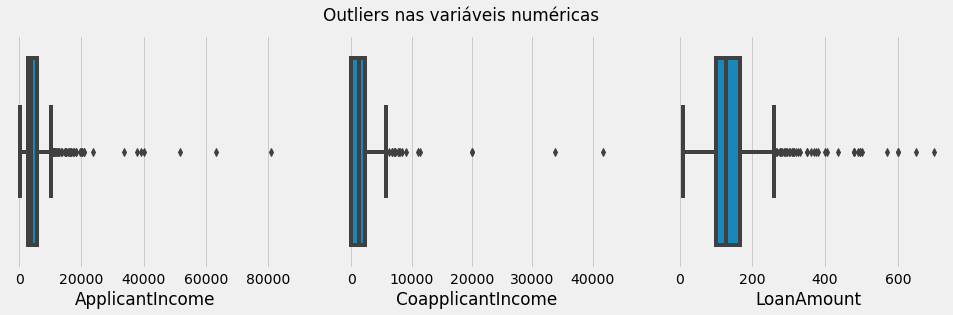

In [9]:
# Preencher valores nulos para variáveis categóricas com a moda
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Preencher valores nulos para variáveis numéricas com a mediana
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# Verificar novamente valores ausentes
print(f"Valores ausentes restantes: {data.isnull().sum().sum()}")

# Visualizar possíveis outliers com boxplot
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])
plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])
plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])
plt.suptitle('Outliers nas variáveis numéricas')
plt.show()

### 4. Transformação e Encoding de Variáveis

In [10]:
# Transformação log nas variáveis com skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# Remover a coluna Loan_ID
data = data.drop('Loan_ID', axis=1)

# Encoding de variáveis categóricas
data['Gender'] = data['Gender'].replace(('Male', 'Female'), (1, 0))
data['Married'] = data['Married'].replace(('Yes', 'No'), (1, 0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'), (1, 0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'), (1, 0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban', 'Rural'), (1, 1, 0))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

### 5. Separação das Variáveis Preditoras e Variável Alvo

In [11]:
# Separar variáveis preditoras (X) e variável alvo (y)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (614, 11)
Shape de y: (614,)


### 6. Balanceamento de Classes com SMOTE

In [12]:
# Aplicar SMOTE para balancear as classes
X_resample, y_resample = SMOTE().fit_resample(X, y)

print("Distribuição das classes após o balanceamento:")
print(pd.Series(y_resample).value_counts())

Distribuição das classes após o balanceamento:
1    422
0    422
Name: Loan_Status, dtype: int64


### 7. Separação dos Dados de Treinamento e Teste

In [13]:
# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=42)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_test: {y_test.shape}")

Shape de X_train: (675, 11)
Shape de y_train: (675,)
Shape de X_test: (169, 11)
Shape de y_test: (169,)


### 8. Treinamento do Modelo (Random Forest Classifier)

In [14]:
# Treinamento com Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Avaliar no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy * 100:.2f}%")

Acurácia no conjunto de teste: 81.07%


### 9. Avaliação do Modelo

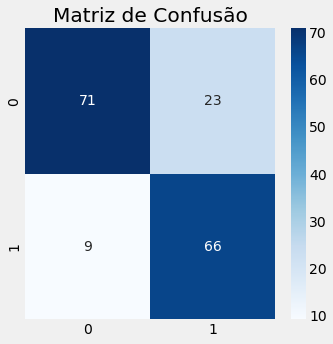

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82        94
           1       0.74      0.88      0.80        75

    accuracy                           0.81       169
   macro avg       0.81      0.82      0.81       169
weighted avg       0.82      0.81      0.81       169



In [15]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

### 10. Validação Cruzada

In [16]:
# Aplicando cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Acurácia média após cross-validation: {cv_scores.mean():.2f}")

Acurácia média após cross-validation: 0.81


### 11. Salvando o Modelo e Preparação para Deploy

In [17]:
# Salvando o modelo com pickle
import joblib
joblib.dump(model, 'loan_approval_model.pkl')

# Salvando o dataset de teste
X_test.to_csv('loan_test_data.csv', index=False)

print("Modelo e dados de teste salvos para deploy.")

Modelo e dados de teste salvos para deploy.


### Conclusão

Este notebook abrange um projeto completo de machine learning, desde a análise exploratória, passando pelo pré-processamento e treinamento do modelo, até o deploy. Na parte 2, podemos avançar para a criação de uma interface interativa usando Streamlit ou outro framework de deploy, permitindo a interação com o modelo em produção.